In [1]:
import sklearn
import numpy as np
import pandas as pa
import matplotlib.pyplot as plot


In [2]:
incomeData = pa.read_csv('/content/sample_data/Income Dataset (50k).csv')
incomeData.head(10)
#print(incomeData)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [3]:
incomeData.shape

(43957, 15)

In [4]:
incomeData.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [5]:
incomeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
#Dropping the null rows from the colums
incomeData=incomeData.dropna(axis=0, subset=['occupation','native-country','workclass'])
print('shape :',incomeData.shape)

shape : (40727, 15)


In [7]:
incomeData['workclass'].unique()
 
category_enc2 = pa.get_dummies(incomeData['workclass'])

category_enc2.head(10)

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0


In [8]:
incomeData['marital-status'].unique()
category_enc3 = pa.get_dummies(incomeData['marital-status']) 
category_enc3.head(10)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


In [9]:
incomeData['occupation'].unique()
category_enc1 = pa.get_dummies(incomeData['occupation']) 
category_enc1.head(10)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
incomeData['gender'].unique()

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
incomeData['gender_new']=en.fit_transform(incomeData['gender'])
print(incomeData[['gender','gender_new']].head())
incomeData['gender']=incomeData['gender_new']


incomeData.head(10)


  gender  gender_new
0   Male           1
1   Male           1
2   Male           1
3   Male           1
4   Male           1


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_new
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,1,99999,0,60,United-States,1,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,1,0,0,15,United-States,0,1
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,40,United-States,1,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,1,0,0,40,United-States,0,1
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,1,0,0,40,United-States,0,1
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,40,United-States,0,1
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,0,2653,0,40,United-States,0,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,1,0,0,60,Japan,0,1
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,1,0,0,50,United-States,0,1
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,4386,0,45,United-States,1,1


In [11]:
incomeData['race'].unique()



from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
incomeData['race_new']=en.fit_transform(incomeData['race'])
print(incomeData[['race','race_new']].head())
incomeData['race']=incomeData['race_new']
incomeData.head(10)

    race  race_new
0  White         4
1  White         4
2  White         4
3  White         4
4  Black         2


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,gender_new,race_new
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,4,1,99999,0,60,United-States,1,1,4
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,4,1,0,0,15,United-States,0,1,4
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,40,United-States,1,1,4
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,4,1,0,0,40,United-States,0,1,4
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,2,1,0,0,40,United-States,0,1,2
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,40,United-States,0,1,4
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,4,0,2653,0,40,United-States,0,0,4
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,4,1,0,0,60,Japan,0,1,4
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,4,1,0,0,50,United-States,0,1,4
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,4,1,4386,0,45,United-States,1,1,4


In [12]:
incomeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40727 non-null  int64 
 1   workclass        40727 non-null  object
 2   fnlwgt           40727 non-null  int64 
 3   education        40727 non-null  object
 4   educational-num  40727 non-null  int64 
 5   marital-status   40727 non-null  object
 6   occupation       40727 non-null  object
 7   relationship     40727 non-null  object
 8   race             40727 non-null  int64 
 9   gender           40727 non-null  int64 
 10  capital-gain     40727 non-null  int64 
 11  capital-loss     40727 non-null  int64 
 12  hours-per-week   40727 non-null  int64 
 13  native-country   40727 non-null  object
 14  income_>50K      40727 non-null  int64 
 15  gender_new       40727 non-null  int64 
 16  race_new         40727 non-null  int64 
dtypes: int64(11), object(6)
memory 

In [13]:
incomeData.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K', 'gender_new', 'race_new'],
      dtype='object')

In [14]:
the_final_data = pa.concat([incomeData[['age','fnlwgt','race_new','educational-num','capital-gain','capital-loss','hours-per-week','gender_new']],pa.concat([category_enc2]),pa.concat([category_enc3]),pa.concat([category_enc1])],axis=1)
the_final_data.head(10)


,age,fnlwgt,race_new,educational-num,capital-gain,capital-loss,hours-per-week,gender_new,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,67,366425,4,16,99999,0,60,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,17,244602,4,8,0,0,15,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,31,174201,4,13,0,0,40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,58,110199,4,4,0,0,40,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,25,149248,2,10,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,59,105363,4,9,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,70,216390,4,5,2653,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,35,361888,4,13,0,0,60,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,28,74784,4,9,0,0,50,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,28,118089,4,9,4386,0,45,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
the_final_data.shape

(40727, 36)

In [16]:
f=the_final_data
l=incomeData['income_>50K']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f, l,test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)

(28508, 36)
(12219, 36)


In [17]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
scaler.fit(x_test)


x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test) 

In [19]:
#SVC

from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

svc_training_score = svc.score(x_train, y_train)
svc_testing_score = svc.score(x_test, y_test)


svc_predict = svc.predict(x_test)
print(svc_predict)


print("Training accuracy of SVC {:.2f}".format(svc_training_score))
print("Testing accuracy of SVC {:.2f}".format(svc_testing_score))

[0 0 0 ... 0 0 0]
Training accuracy of SVC 0.85
Testing accuracy of SVC 0.84


In [20]:
#RAndomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)



rfc.fit(x_train, y_train)
rfc_training_score = rfc.score(x_train, y_train)
rfc_testing_score = rfc.score(x_test, y_test)



rf_predict = rfc.predict(x_test)
print(rf_predict)


print("The Training accuracy of RF  {:.2f}".format(rfc_training_score))
print("The Testing accuracy of RF {:.2f}".format(rfc_testing_score))


[0 1 0 ... 0 0 0]
The Training accuracy of RF  1.00
The Testing accuracy of RF 0.85


In [21]:
#NNC




from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)




nnc.fit(x_train, y_train)
nnc_training_score = nnc.score(x_train, y_train)
nnc_testing_score = nnc.score(x_test, y_test)


nnc_predict = nnc.predict(x_test)
print(nnc_predict)

print("The Training accuracy of NNC {:.2f}".format(nnc_training_score))
print("The Testing accuracy of NNC {:.2f}".format(nnc_testing_score))


[0 0 0 ... 0 0 0]
The Training accuracy of NNC 0.86
The Testing accuracy of NNC 0.85


In [22]:
#Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(f)
f_scaled = scaler.transform(f)
 
income_dataframe = pa.DataFrame(f_scaled, columns=f.columns)


#PCA
from sklearn.decomposition import PCA 
pca_ = PCA(n_components=5)


pincipal = pca_.fit_transform(income_dataframe.values)
print(pincipal)


principal_dataframe = pa.DataFrame(data=pincipal, columns=     ["principle component 1",
                                                                "principle component 2",
                                                                "principle component 3",
                                                                "principle component 4",
                                                                "principle component 5"
                                                                ])
main_dataframe =pa.concat([principal_dataframe, l], axis=1)
main_dataframe.head()




f_new =main_dataframe.drop("income_>50K" , axis=1)
l_new =main_dataframe["income_>50K"]

x_train, x_test, y_train, y_test = train_test_split(f, l, test_size=0.2, random_state=2)


[[ 0.00723245  0.1298319  -0.54397434  0.65997172  0.81974867]
 [ 0.71733834 -0.56383045  0.47015974  0.11680974  0.0563931 ]
 [-0.67647312 -0.30454548 -0.20938656 -0.26848539  0.74534305]
 ...
 [ 0.17170346 -0.09501286 -0.49763414  0.69535525  0.08006604]
 [ 0.98767525 -0.14516863  0.03961024 -0.35890794  0.08387999]
 [ 0.58471874 -0.60049022  0.50496508  0.14738752  0.06960233]]


In [23]:
#SVCPOst

#scale

scaler = MinMaxScaler()

scaler.fit(x_train)
scaler.fit(x_test)


x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test) 

sv = SVC(kernel="linear")



sv.fit(x_train, y_train)
post_sv_training_score = sv.score(x_train, y_train)
post_sv_testing_score = sv.score(x_test, y_test)

print("Training accuracy of SVC2 {:.2f}".format(post_sv_training_score))
print("Testing accuracy of SVc2 {:.2f}".format(post_sv_testing_score))


post_sv_predict = svc.predict(x_test)
print(post_sv_predict)

Training accuracy of SVC2 0.85
Testing accuracy of SVc2 0.84
[0 0 0 ... 0 0 0]


In [24]:
#RF2
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)


post_rf_training_score = rf.score(x_train, y_train)
post_rf_testing_score = rf.score(x_test, y_test)

print("The Training accuracy of RF2 {:.2f}".format(post_rf_training_score))
print("The Testing accuracy of RF2  {:.2f}".format(post_rf_testing_score))


post_rf_predict = rf.predict(x_test)
print(post_rf_predict)


The Training accuracy of RF2 1.00
The Testing accuracy of RF2  0.85
[0 0 0 ... 0 0 0]


In [25]:
#NNC post

nn =MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)


nn.fit(x_train, y_train)


post_nn_training_score = nn.score(x_train, y_train)
post_nn_testing_score = nn.score(x_test, y_test)

print("The Training accuracy of NNC2 {:.2f}".format(post_nn_training_score))
print("The Testing accuracy of NNC2 {:.2f}".format(post_nn_testing_score))


post_nn_predict = nnc.predict(x_test)
print(post_nn_predict )

The Training accuracy of NNC2 0.85
The Testing accuracy of NNC2 0.85
[0 0 0 ... 0 0 0]


<BarContainer object of 6 artists>

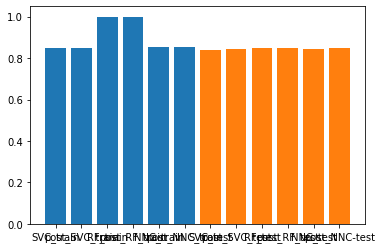

In [26]:
#PLot
plot.bar(x = ["SVC_train", "post_SVC_train", "RF_train", "post_RF_train", "NNC_train", "post_NNC_train"],
        height = [svc_training_score, post_sv_training_score,rfc_training_score,
                  post_rf_training_score, nnc_training_score,post_nn_training_score])

plot.bar(x = ["SVC_test", "post_SVC_test", "RF_test", "post_RF_test", "NNC_test", "post_NNC-test"],
        height = [svc_testing_score, post_sv_testing_score, rfc_testing_score, post_rf_testing_score,
                  nnc_testing_score, post_nn_testing_score])